<a href="https://colab.research.google.com/github/Avaniharetlia/MLPROJECTS/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('/content/diabetes.csv')
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

Negative(0):  500
Positive(1):  268


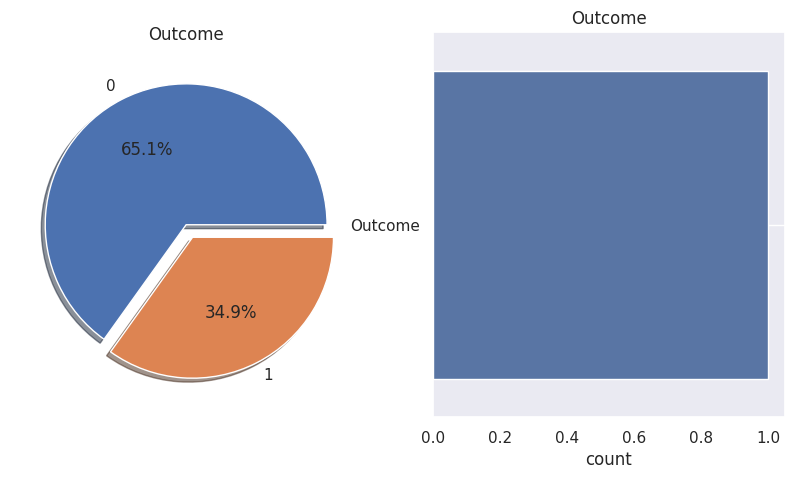

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
f,ax=plt.subplots(1,2,figsize=(10,5))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sns.countplot('Outcome',ax=ax[1])
ax[1].set_title('Outcome')
N,P=df['Outcome'].value_counts()
print("Negative(0): ",N)
print("Positive(1): ",P)
plt.grid()
plt.show()

array([[<Axes: xlabel='Pregnancies', ylabel='Pregnancies'>,
        <Axes: xlabel='Glucose', ylabel='Pregnancies'>,
        <Axes: xlabel='BloodPressure', ylabel='Pregnancies'>,
        <Axes: xlabel='SkinThickness', ylabel='Pregnancies'>,
        <Axes: xlabel='Insulin', ylabel='Pregnancies'>,
        <Axes: xlabel='BMI', ylabel='Pregnancies'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <Axes: xlabel='Age', ylabel='Pregnancies'>,
        <Axes: xlabel='Outcome', ylabel='Pregnancies'>],
       [<Axes: xlabel='Pregnancies', ylabel='Glucose'>,
        <Axes: xlabel='Glucose', ylabel='Glucose'>,
        <Axes: xlabel='BloodPressure', ylabel='Glucose'>,
        <Axes: xlabel='SkinThickness', ylabel='Glucose'>,
        <Axes: xlabel='Insulin', ylabel='Glucose'>,
        <Axes: xlabel='BMI', ylabel='Glucose'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>,
        <Axes: xlabel='Age', ylabel='Glucose'>,
        <Axes: xlabel='Outcom

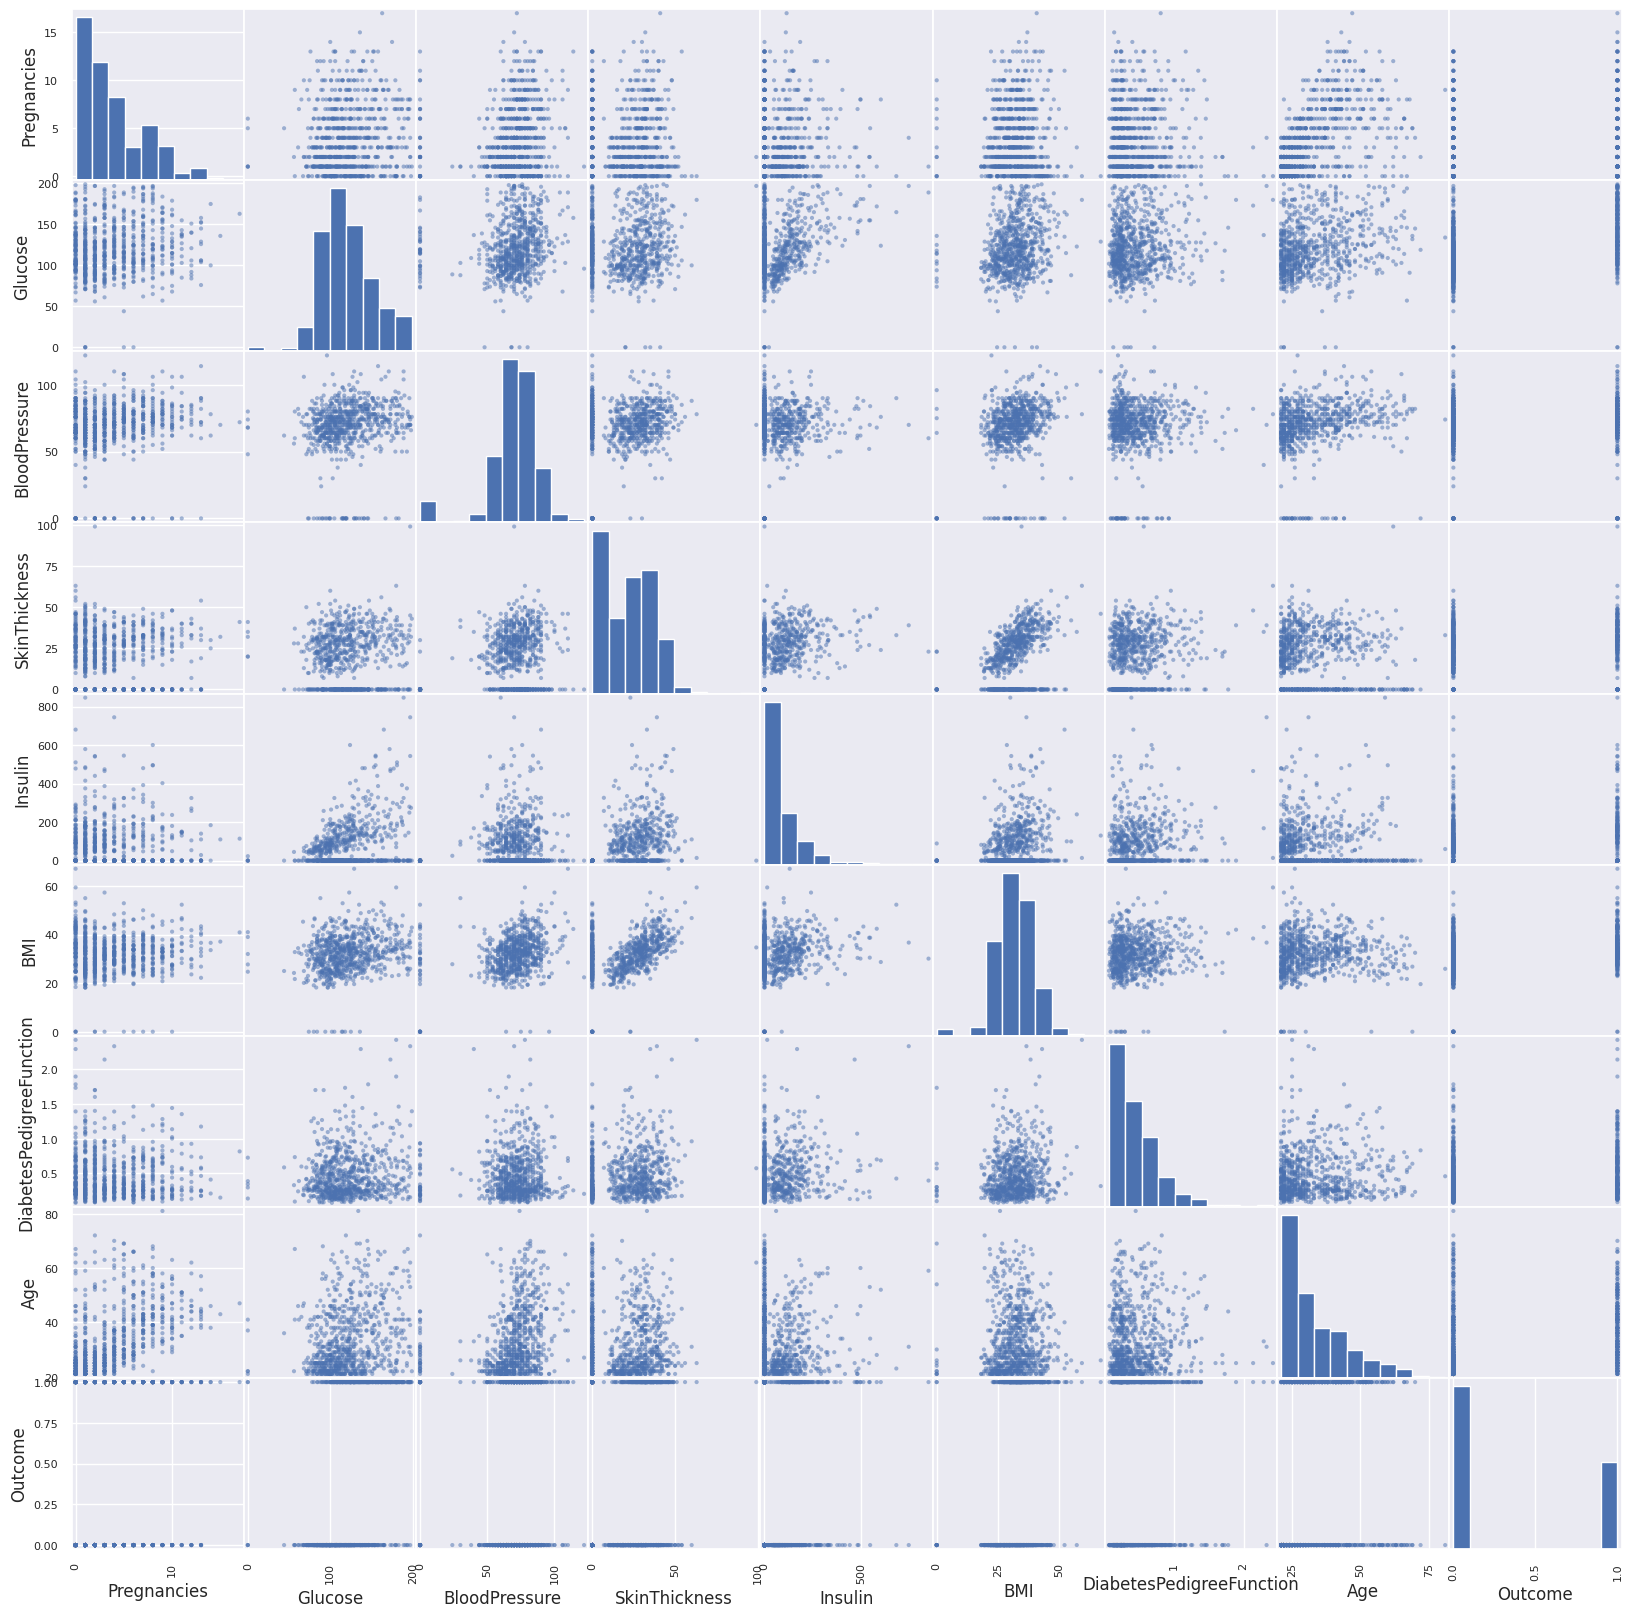

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(20,20))

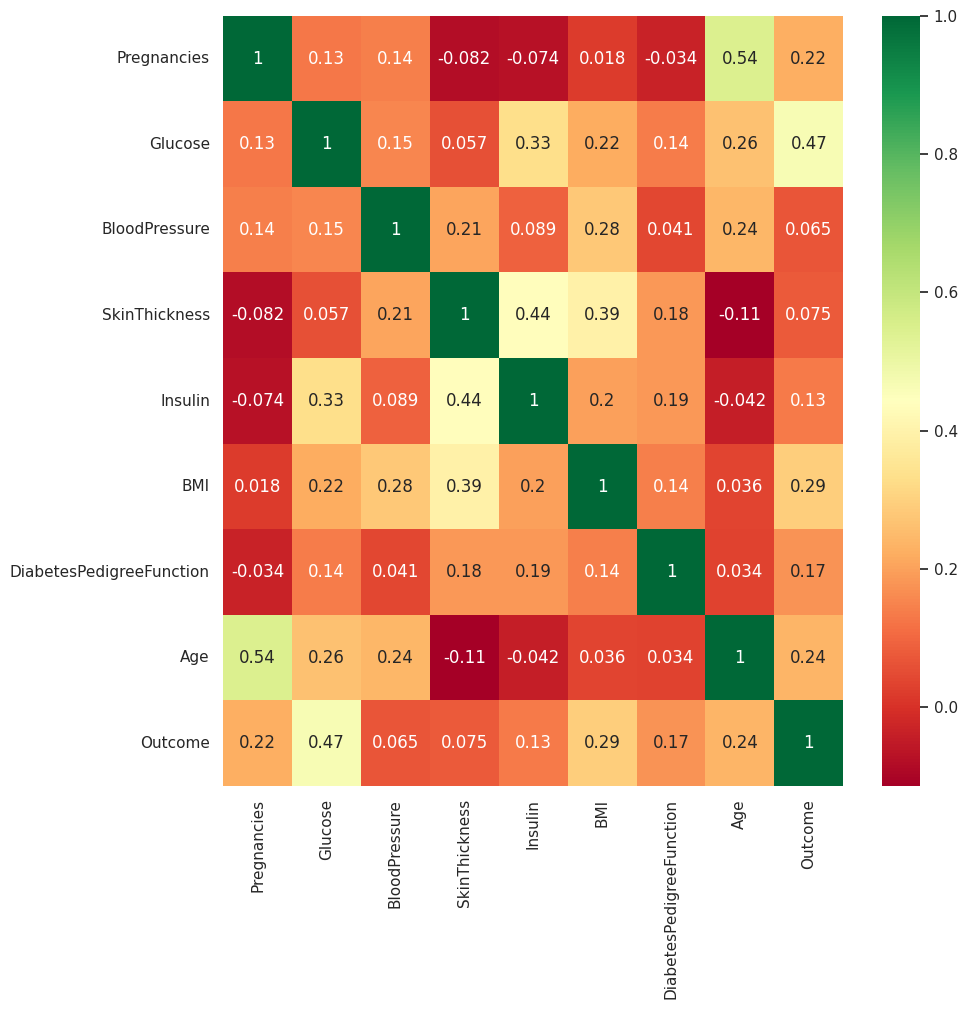

In [ ]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
outcome='Outcome'
y=df[outcome]
x=df.drop(outcome,axis=1)
x.head()

from sklearn.preprocessing import Normalizer
normalizer=Normalizer()
normalizer.fit(x)
x_normalized=normalizer.transform(x)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_normalized,y,test_size=0.2,random_state=42)
x_train.shape,y_train.shape

((614, 8), (614,))

In [ ]:
x_test.shape,y_test.shape
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)


DecisionTreeClassifier()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
knn.predict(x_test)
dt_pred=dt.predict(x_test)
print("train accuracy of score",dt.score(x_train,y_train)*100)
print("test accuracy of score",dt.score(x_test,y_test)*100)
print("accuracy of score decision tree", accuracy_score(y_test,dt_pred)*100)

train accuracy of score 100.0
test accuracy of score 57.14285714285714
accuracy of score decision tree 57.14285714285714


In [ ]:
knn_pred=knn.predict(x_test)
print("train accuracy of score",knn.score(x_train,y_train)*100)
print("test accuracy of score",knn.score(x_test,y_test)*100)
print("accuracy of score knn", accuracy_score(y_test,knn_pred)*100)

train accuracy of score 80.78175895765473
test accuracy of score 68.18181818181817
accuracy of score knn 68.18181818181817
